loading annotations into memory...
Done (t=0.54s)
creating index...
index created!
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'n

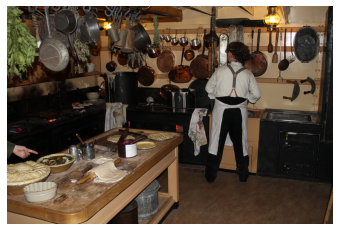

[{'segmentation': [[224.24, 297.18, 228.29, 297.18, 234.91, 298.29, 243.0, 297.55, 249.25, 296.45, 252.19, 294.98, 256.61, 292.4, 254.4, 264.08, 251.83, 262.61, 241.53, 260.04, 235.27, 259.67, 230.49, 259.67, 233.44, 255.25, 237.48, 250.47, 237.85, 243.85, 237.11, 240.54, 234.17, 242.01, 228.65, 249.37, 224.24, 255.62, 220.93, 262.61, 218.36, 267.39, 217.62, 268.5, 218.72, 295.71, 225.34, 297.55]], 'area': 1481.3806499999994, 'iscrowd': 0, 'image_id': 397133, 'bbox': [217.62, 240.54, 38.99, 57.75], 'category_id': 44, 'id': 82445}, {'segmentation': [[292.37, 425.1, 340.6, 373.86, 347.63, 256.31, 198.93, 240.24, 4.02, 311.57, 1.0, 427.0, 291.36, 427.0]], 'area': 54085.6217, 'iscrowd': 0, 'image_id': 397133, 'bbox': [1.0, 240.24, 346.63, 186.76], 'category_id': 67, 'id': 119568}, {'segmentation': [[446.71, 70.66, 466.07, 72.89, 471.28, 78.85, 473.51, 88.52, 473.51, 98.2, 462.34, 111.6, 475.74, 126.48, 484.67, 136.16, 494.35, 157.74, 496.58, 174.12, 498.07, 182.31, 485.42, 189.75, 474.25, 

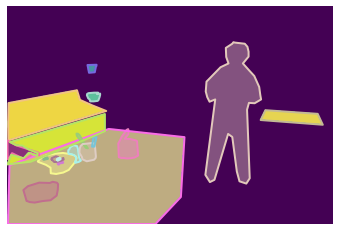

In [36]:
import torch
import matplotlib
#import timm
from pycocotools.coco import COCO
import numpy as np
# import skimage.io as io
import matplotlib.image as mpimg
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# import visualize


annFile='../Data/annotations/instances_val2017.json'

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)


def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', getClassName(76, cats))


imgIds = coco.getImgIds()
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
# img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco.loadImgs(imgIds[0])[0]
I = mpimg.imread('../Data/val2017/{}'.format(img['file_name']))
# I = io.imread('../Data/val2017/{}'.format(img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()


# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print(anns)

#### GENERATE A SEGMENTATION MASK ####
# filterClasses = ['laptop', 'tv', 'cell phone']
classes = [cat['name'] for cat in cats]
mask = np.zeros((img['height'], img['width']))
for i in range(len(anns)):
    className = getClassName(anns[i]['category_id'], cats)
    pixel_value = classes.index(className) + 1
    mask = np.maximum(coco.annToMask(anns[i]) * pixel_value, mask)
plt.imshow(mask)

classes = [cat['name'] for cat in cats]
mask = np.zeros((img['height'], img['width']))
for i in range(len(anns)):
    className = getClassName(anns[i]['category_id'], cats)
    pixel_value = classes.index(className) + 1
    bbox = anns[i]['bbox']
    print(bbox)
    

# all_labels = [cat['name'] for cat in cats]
# categories_df = df = pd.DataFrame(all_labels, columns=['name'])
# target_dim = 512
# visualize = visualize.Visualize('../', categories_df, target_dim)
# visualize.show_image_data()